#### El ejemplo de la dieta del ratón

Demostraremos cómo analizar los datos de la dieta alta en grasas utilizando modelos lineales en lugar de aplicar directamente una prueba t. Demostraremos cómo, en última instancia, estos dos enfoques son equivalentes.

Comenzamos leyendo los datos y creando un gráfico rápido:

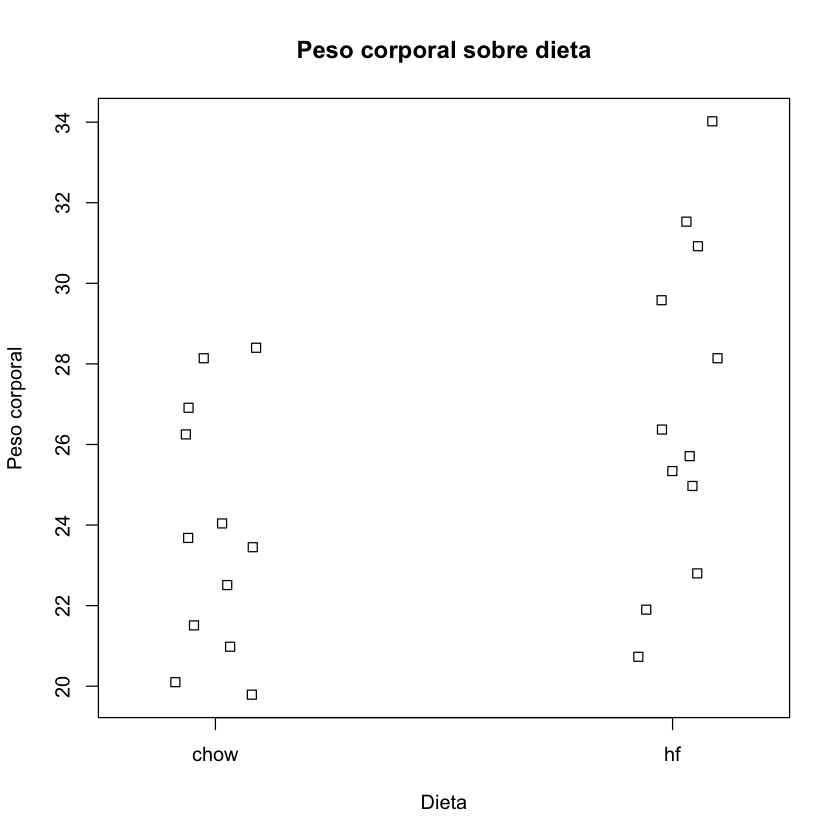

In [5]:
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/femaleMiceWeights.csv"
#filename <- "femaleMiceWeights.csv"
#library(downloader)
#if (!file.exists(filename)) download(url, filename)
dat <- read.csv(url)
set.seed(1) # mismo jitter en stripchart
stripchart(dat$Bodyweight ~ dat$Diet, vertical=TRUE, method="jitter",
           main="Peso corporal sobre dieta", xlab='Dieta', ylab='Peso corporal')

Podemos ver que el grupo de la dieta alta en grasas parece tener pesos más altos en promedio, aunque hay superposición entre las dos muestras.

Para propósitos de demostración, construiremos la matriz de diseño $\mathbf{X}$ usando la fórmula `~ Diet`. El grupo con los 1 en la segunda columna está determinado por el nivel de 'Dieta' que viene en segundo lugar; es decir, el nivel de no referencia.

In [9]:
levels(dat$Diet)
X <- model.matrix(~ Diet, data=dat)
head(X)

NULL

,(Intercept),Diethf
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


## Las matemáticas detrás de lm()

Antes de usar nuestro atajo para ejecutar modelos lineales, `lm`, queremos revisar lo que sucederá internamente. Dentro de `lm`, formaremos la matriz de diseño $\mathbf{X}$ y calcularemos el $\boldsymbol{\beta}$, que minimiza la suma de cuadrados usando la fórmula descrita anteriormente. La fórmula de esta solución es:

$$ \hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y} $$

Podemos calcular esto en R usando nuestro operador de multiplicación de matrices `%*%`, la función inversa `solve` y la función transpuesta `t`.

In [14]:
Y <- dat$Bodyweight
X <- model.matrix(~ Diet, data=dat)
X
solve(t(X) %*% X) %*% t(X) %*% Y

,(Intercept),Diethf
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0
10,1,0


(Intercept),23.813333
Diethf,3.020833


In [12]:
Y <- dat$Bodyweight
X <- model.matrix(~ Diet, data=dat)
solve(crossprod(X)) %*% t(X) %*% Y

(Intercept),23.813333
Diethf,3.020833


In [15]:
crossprod(X)

,(Intercept),Diethf
(Intercept),24,12
Diethf,12,12


In [16]:
solve(crossprod(X))

,(Intercept),Diethf
(Intercept),0.08333333,-0.08333333
Diethf,-0.08333333,0.16666667


In [19]:
a <- solve(crossprod(X)) %*% t(X)
a

,1,2,3,4,5,6,7,8,9,10,⋯,15,16,17,18,19,20,21,22,23,24
(Intercept),0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Diethf,-0.08333333,-0.08333333,-0.08333333,-0.08333333,-0.08333333,-0.08333333,-0.08333333,-0.08333333,-0.08333333,-0.08333333,⋯,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333,0.08333333


In [20]:
a %*% Y

(Intercept),23.813333
Diethf,3.020833


In [21]:
Y

[1] 21.51 28.14 24.04 23.45 23.68 19.79 28.40 20.98 22.51 20.10 26.91 26.25
[13] 25.71 26.37 22.80 25.34 24.97 28.14 29.58 30.92 34.02 21.90 31.53 20.73